# import stuff

In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import gen_filtered_lambda_terms_v2

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [7]:
from calculus_utils.drawing import *
from calculus_utils.outliers_cleaning import clear_arr

In [3]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 200
RANDOM_AVERAGE_COUNT = 20

# Old generation (no updating bound vars) and old / new tests
## generate terms (with NO update bound vars) and norm this terms in oldstyle

In [4]:
terms_o, stepsLO_oo = gen_filtered_lambda_terms_v2(count_terms=LAMBDA_TERM_COUNT,
                                                   down_vertices_limit=DOWNLIMIT,
                                                   up_vertices_limit=UPLIMIT,
                                                   update_bound_vars=False  # made generation in old style
                                                   )

print(f"number of terms with normal form {len(terms_o)}")
print("number of steps to normalize using LO strategy= {}".format(stepsLO_oo))

stepsRI_oo = [term.normalize(RightmostInnermostStrategy(), update_bound_vars=False)[1] for term in terms_o]
print("number of steps to normalize using RI strategy= {}".format(stepsRI_oo))

stepsRand_oo = [
    sum([term.normalize(RandomStrategy(), update_bound_vars=False)[1] for i in range(RANDOM_AVERAGE_COUNT)])
    / RANDOM_AVERAGE_COUNT
    for term in terms_o
]
print("number of steps to normalize using Random strategy= {}".format(stepsRand_oo))

number of terms with normal form 201
number of steps to normalize using LO strategy= [3, 3, 40, 1, 40, 11, 4, 12, 1, 3, 7, 5, 5, 4, 2, 10, 6, 2, 19, 3, 7, 6, 12, 5, 30, 7, 3, 6, 87, 9, 2, 2, 6, 8, 3, 7, 3, 5, 5, 7, 12, 5, 2, 3, 18, 27, 3, 19, 5, 6, 4, 4, 26, 7, 1, 8, 11, 6, 1, 2, 7, 1, 1, 16, 14, 4, 2, 9, 5, 2, 1, 5, 14, 19, 6, 25, 12, 5, 48, 27, 2, 48, 5, 18, 5, 2, 3, 7, 4, 4, 3, 11, 10, 9, 5, 2, 7, 7, 5, 5, 4, 7, 187, 4, 5, 5, 27, 2, 8, 8, 4, 2, 9, 15, 7, 22, 3, 9, 24, 7, 13, 5, 7, 9, 36, 6, 9, 3, 2, 4, 3, 3, 8, 6, 23, 7, 5, 14, 7, 3, 3, 3, 8, 11, 3, 13, 4, 36, 4, 13, 10, 3, 6, 2, 13, 5, 9, 9, 6, 5, 13, 2, 4, 10, 3, 6, 7, 11, 4, 33, 1, 3, 3, 5, 115, 18, 9, 4, 1, 5, 13, 4, 2, 1, 3, 11, 6, 1, 3, 13, 3, 3, 21, 4, 2, 12, 8, 2, 4, 5, 4]
number of steps to normalize using RI strategy= [8, 4, 19, 2, 12, 13, 5, 13, 1, 4, 9, 5, 5, 6, 4, 6, 9, 4, 12, 4, 11, 6, 15, 10, 20, 33, 10, 8, 22, 13, 4, 6, 5, 9, 9, 18, 9, 6, 8, 7, 11, 7, 5, 9, 14, 18, 3, 16, 5, 9, 4, 7, 27, 12, 1, 13, 6, 10, 6, 6, 7, 5,

## norm in the new style old generated terms

In [6]:
stepsLO_on = [term.normalize(LeftmostOutermostStrategy(), update_bound_vars=True)[1] for term in terms_o]
print("number of steps to normalize using LO strategy= {}".format(stepsLO_on))

stepsRI_on = [term.normalize(RightmostInnermostStrategy(), update_bound_vars=True)[1] for term in terms_o]
print("number of steps to normalize using RI strategy= {}".format(stepsRI_on))

stepsRand_on = [
    sum([term.normalize(RandomStrategy(), update_bound_vars=True)[1] for i in range(RANDOM_AVERAGE_COUNT)])
    / RANDOM_AVERAGE_COUNT
    for term in terms_o
]
print("number of steps to normalize using Random strategy= {}".format(stepsRand_on))

number of steps to normalize using LO strategy= [3, 3, 40, 1, 40, 11, 4, 12, 1, 3, 7, 5, 5, 4, 2, 10, 6, 2, 19, 3, 7, 6, 12, 5, 23, 7, 3, 6, 87, 9, 2, 2, 6, 8, 3, 7, 3, 5, 5, 7, 12, 5, 2, 3, 18, 27, 3, 19, 5, 6, 4, 4, 26, 7, 1, 8, 11, 6, 1, 2, 7, 1, 1, 16, 14, 4, 2, 9, 5, 2, 1, 5, 14, 16, 6, 25, 12, 5, 48, 27, 2, 48, 5, 18, 5, 2, 3, 7, 4, 4, 3, 11, 10, 9, 5, 2, 7, 7, 5, 5, 4, 7, 109, 4, 5, 5, 27, 2, 8, 8, 4, 2, 9, 14, 7, 22, 3, 9, 24, 7, 13, 5, 7, 9, 36, 6, 9, 3, 2, 4, 3, 3, 8, 6, 23, 7, 5, 14, 7, 3, 3, 3, 8, 11, 3, 13, 4, 36, 4, 13, 10, 3, 6, 2, 13, 5, 9, 9, 6, 5, 13, 2, 4, 10, 3, 6, 7, 11, 4, 33, 1, 3, 3, 5, 115, 18, 9, 4, 1, 5, 12, 4, 2, 1, 3, 11, 6, 1, 3, 13, 3, 3, 21, 4, 2, 12, 8, 2, 4, 5, 4]
number of steps to normalize using RI strategy= [8, 4, 19, 2, 12, 13, 5, 13, 1, 4, 9, 5, 5, 6, 4, 6, 9, 4, 12, 4, 11, 6, 15, 10, 19, 33, 10, 8, 22, 13, 4, 6, 5, 9, 9, 18, 9, 6, 8, 7, 11, 7, 5, 9, 14, 18, 3, 16, 5, 9, 4, 7, 27, 12, 1, 13, 6, 10, 6, 6, 7, 5, inf, 16, 39, 11, 7, 16, 5, 2, 6, 5, 

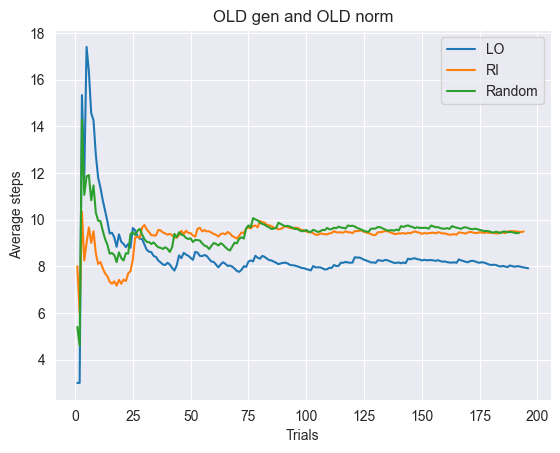

In [8]:
comp_data = {
    "LO": (clear_arr(stepsLO_oo), "-"),
    "RI": (clear_arr(stepsRI_oo), "-"),
    "Random": (clear_arr(stepsRand_oo), "-"),
}

draw_cumulative_avg_comparison(comp_data, title=f"OLD gen and OLD norm")

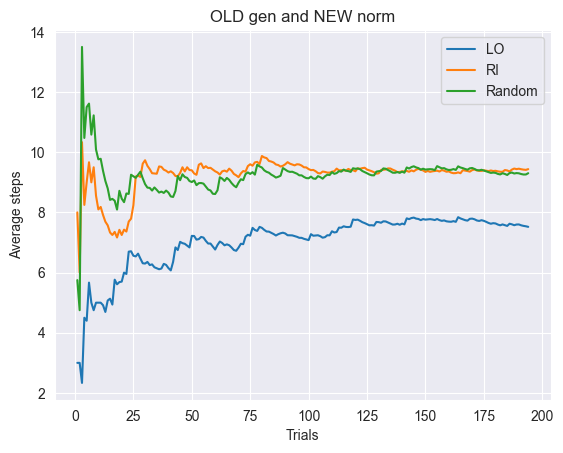

In [9]:
comp_data = {
    "LO": (clear_arr(stepsLO_on), "-"),
    "RI": (clear_arr(stepsRI_on), "-"),
    "Random": (clear_arr(stepsRand_on), "-"),
}

draw_cumulative_avg_comparison(comp_data, title=f"OLD gen and NEW norm")

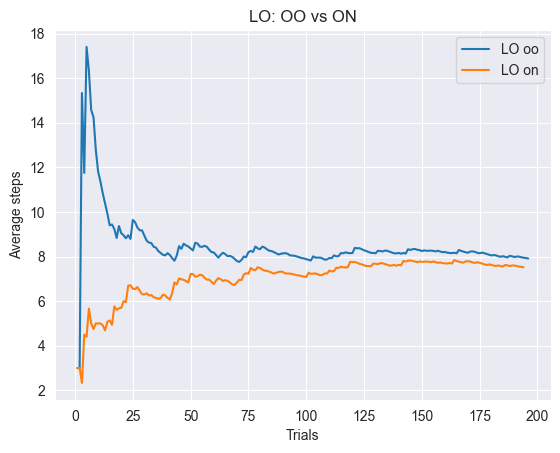

In [10]:
comp_data = {
    "LO oo": (clear_arr(stepsLO_oo), "-"),
    "LO on": (clear_arr(stepsLO_on), "-"),
}

draw_cumulative_avg_comparison(comp_data, title=f"LO: OO vs ON")

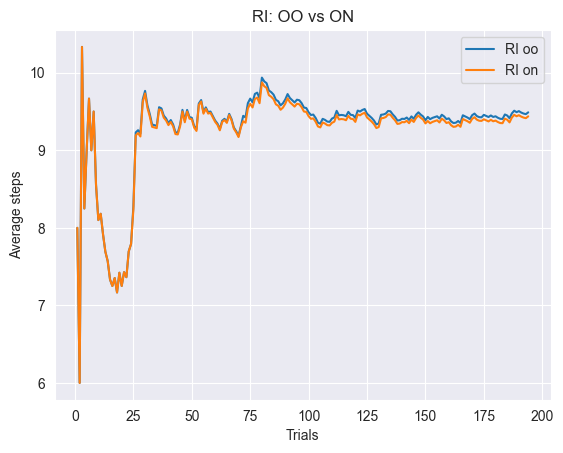

In [11]:
comp_data = {
    "RI oo": (clear_arr(stepsRI_oo), "-"),
    "RI on": (clear_arr(stepsRI_on), "-"),
}

draw_cumulative_avg_comparison(comp_data, title=f"RI: OO vs ON")

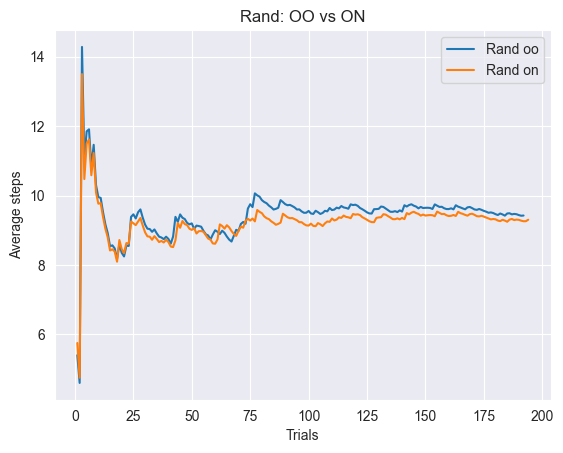

In [12]:
comp_data = {
    "Rand oo": (clear_arr(stepsRand_oo), "-"),
    "Rand on": (clear_arr(stepsRand_on), "-"),
}

draw_cumulative_avg_comparison(comp_data, title=f"Rand: OO vs ON")

# New generation (updating bound vars) and old / new tests
## generate terms (with update bound vars) and norm this terms in the new style

In [13]:
terms_n, stepsLO_nn = gen_filtered_lambda_terms_v2(count_terms=LAMBDA_TERM_COUNT,
                                                   down_vertices_limit=DOWNLIMIT,
                                                   up_vertices_limit=UPLIMIT,
                                                   update_bound_vars=True  # made generation in old style
                                                   )

print(f"number of terms with normal form {len(terms_n)}")
print("number of steps to normalize using LO strategy= {}".format(stepsLO_nn))

stepsRI_nn = [term.normalize(RightmostInnermostStrategy(), update_bound_vars=True)[1] for term in terms_n]
print("number of steps to normalize using RI strategy= {}".format(stepsRI_nn))

stepsRand_nn = [
    sum([term.normalize(RandomStrategy(), update_bound_vars=True)[1] for i in range(RANDOM_AVERAGE_COUNT)])
    / RANDOM_AVERAGE_COUNT
    for term in terms_n
]
print("number of steps to normalize using Random strategy= {}".format(stepsRand_nn))

number of terms with normal form 200
number of steps to normalize using LO strategy= [6, 3, 67, 10, 11, 3, 9, 1, 11, 1, 6, 6, 6, 10, 13, 6, 16, 3, 18, 1, 3, 6, 4, 9, 8, 16, 2, 5, 8, 12, 42, 7, 2, 2, 9, 20, 2, 76, 8, 25, 8, 3, 5, 3, 82, 1, 16, 11, 2, 3, 2, 4, 2, 5, 162, 57, 10, 4, 9, 2, 8, 5, 4, 10, 9, 9, 4, 4, 3, 16, 3, 6, 2, 4, 5, 1, 11, 1, 5, 61, 1, 14, 4, 23, 247, 7, 2, 4, 5, 3, 1, 1, 18, 5, 3, 1, 5, 4, 1, 6, 6, 4, 7, 2, 42, 10, 8, 11, 3, 6, 13, 1, 3, 22, 8, 6, 8, 4, 20, 5, 11, 8, 1, 4, 8, 6, 2, 4, 2, 8, 5, 4, 8, 1, 29, 13, 6, 6, 1, 46, 2, 28, 16, 6, 4, 6, 15, 2, 5, 3, 25, 13, 5, 37, 9, 8, 1, 3, 8, 2, 10, 4, 1, 3, 3, 15, 2, 15, 9, 18, 3, 2, 12, 13, 4, 14, 3, 2, 20, 2, 3, 1, 2, 8, 6, 3, 10, 24, 5, 8, 2, 3, 12, 5, 115, 13, 4, 10, 1, 2]
number of steps to normalize using RI strategy= [6, 5, 38, 10, 12, 4, 4, 5, 14, 6, 11, 9, 7, 6, 13, 6, 15, 14, 11, 9, 5, 9, 8, 9, 13, 17, 2, 19, 10, 14, 19, 6, 10, 6, 11, inf, 6, 20, 10, 20, 9, 11, 6, 3, 34, 10, 8, 9, 9, 5, 10, 7, 7, 11, 100, 19, 13, 8,

## norm in the old style new generated terms

In [15]:
stepsLO_no = [term.normalize(LeftmostOutermostStrategy(), update_bound_vars=False)[1] for term in terms_n]
print("number of steps to normalize using LO strategy= {}".format(stepsLO_no))

stepsRI_no = [term.normalize(RightmostInnermostStrategy(), update_bound_vars=False)[1] for term in terms_n]
print("number of steps to normalize using RI strategy= {}".format(stepsRI_no))

stepsRand_no = [
    sum([term.normalize(RandomStrategy(), update_bound_vars=False)[1] for i in range(RANDOM_AVERAGE_COUNT)])
    / RANDOM_AVERAGE_COUNT
    for term in terms_n
]
print("number of steps to normalize using Random strategy= {}".format(stepsRand_no))

number of steps to normalize using LO strategy= [6, 3, 67, 10, 11, 3, 9, 1, 11, 1, 6, 6, 6, 10, 13, 6, 16, 3, 18, 1, 3, 6, 4, 9, 8, 16, 2, 5, 8, 12, 74, 7, 2, 2, 9, 20, 2, 76, 8, 30, 8, 3, 5, 3, 32, 1, 16, 11, 2, 3, 2, 4, 2, 5, inf, 57, 10, 4, 9, 2, 8, 5, 4, 10, 9, 9, 4, 4, 3, 16, 3, 6, 2, 4, 5, 1, 11, 1, 5, inf, 1, 14, 4, 23, 247, 7, 2, 4, 5, 3, 1, 1, 18, 5, 3, 1, 5, 4, 1, 6, 6, 4, 7, 2, 42, 10, 8, 11, 3, 6, 13, 1, 3, 28, 8, 6, 8, 4, 20, 5, 11, 8, 1, 4, 8, 6, 2, 4, 2, 8, 5, 4, 8, 1, 29, 13, 6, 6, 1, inf, 2, inf, 16, 6, 4, 6, 15, 2, 5, 3, 25, 13, 5, 37, 9, 8, 1, 3, 8, 2, 10, 4, 1, 3, 3, 15, 2, 15, 9, 18, 3, 2, 12, 13, 4, 14, 3, 2, 20, 2, 3, 1, 2, 8, 6, 3, 10, inf, 5, 8, 2, 3, 12, 5, 115, 13, 4, 10, 1, 2]
number of steps to normalize using RI strategy= [6, 5, 38, 10, 12, 4, 4, 5, 14, 6, 11, 9, 7, 6, 13, 6, 15, 14, 11, 9, 5, 9, 8, 9, 13, 17, 2, 19, 10, 14, 19, 6, 10, 6, 11, inf, 6, 20, 10, 20, 9, 11, 6, 3, inf, 10, 8, 9, 9, 5, 10, 7, 7, 11, 100, 19, 13, 8, 8, 4, 8, inf, 6, 7, 9, 15, 8, 5

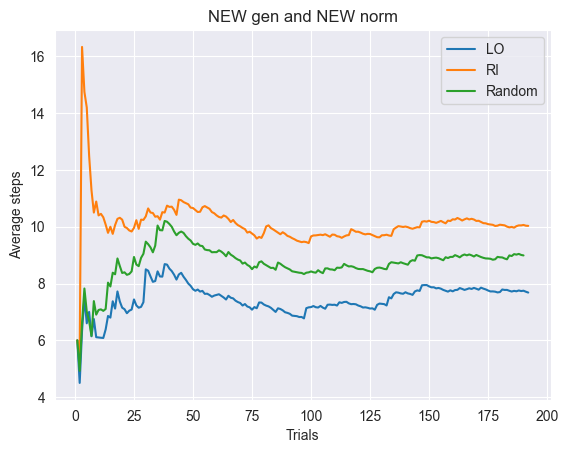

In [16]:
comp_data = {
    "LO": (clear_arr(stepsLO_nn), "-"),
    "RI": (clear_arr(stepsRI_nn), "-"),
    "Random": (clear_arr(stepsRand_nn), "-"),
}

draw_cumulative_avg_comparison(comp_data, title=f"NEW gen and NEW norm")

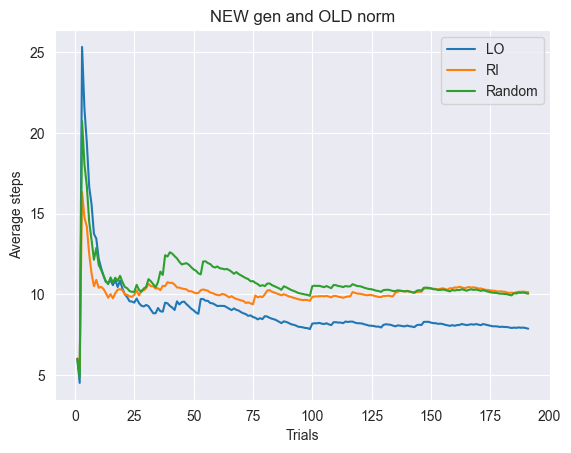

In [17]:
comp_data = {
    "LO": (clear_arr(stepsLO_no), "-"),
    "RI": (clear_arr(stepsRI_no), "-"),
    "Random": (clear_arr(stepsRand_no), "-"),
}

draw_cumulative_avg_comparison(comp_data, title=f"NEW gen and OLD norm")

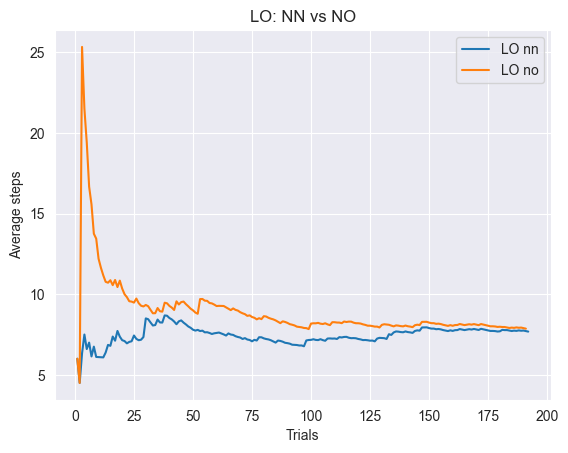

In [18]:
comp_data = {
    "LO nn": (clear_arr(stepsLO_nn), "-"),
    "LO no": (clear_arr(stepsLO_no), "-"),
}

draw_cumulative_avg_comparison(comp_data, title=f"LO: NN vs NO")

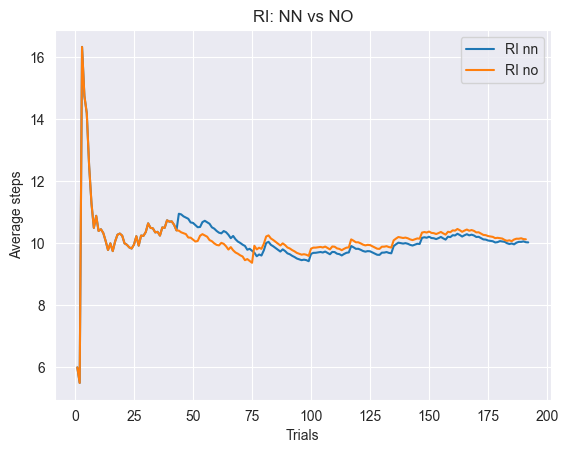

In [19]:
comp_data = {
    "RI nn": (clear_arr(stepsRI_nn), "-"),
    "RI no": (clear_arr(stepsRI_no), "-"),
}

draw_cumulative_avg_comparison(comp_data, title=f"RI: NN vs NO")

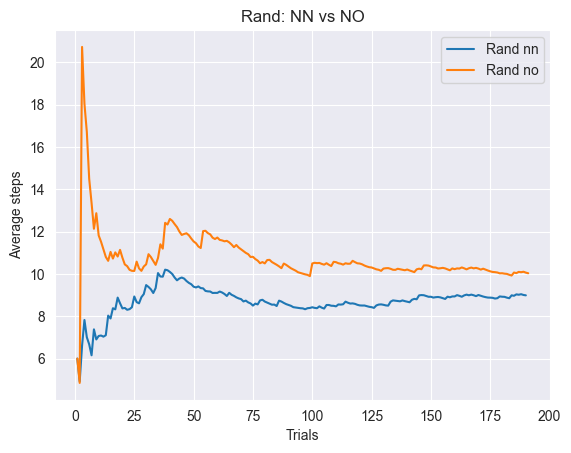

In [20]:
comp_data = {
    "Rand nn": (clear_arr(stepsRand_nn), "-"),
    "Rand no": (clear_arr(stepsRand_no), "-"),
}

draw_cumulative_avg_comparison(comp_data, title=f"Rand: NN vs NO")